# Familiarizing my self with audio data

In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import sklearn
import tqdm
import json

In [2]:
with open('nsynth-test/examples.json', 'r') as f:
    meta = json.load(f)

In [3]:
# Inspect the metadata keys
first_key = list(meta.keys())[0]
print(meta[first_key])

{'qualities': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'pitch': 49, 'note': 217499, 'instrument_source_str': 'synthetic', 'velocity': 25, 'instrument_str': 'bass_synthetic_068', 'instrument': 656, 'sample_rate': 16000, 'qualities_str': ['dark'], 'instrument_source': 2, 'note_str': 'bass_synthetic_068-049-025', 'instrument_family': 0, 'instrument_family_str': 'bass'}


In [4]:
#Filter to reed audio, because that's my primary instrument
reed_files = [fname for fname, info in meta.items() if info['instrument_family_str'] == 'reed']
print(f"Found {len(reed_files)} reed samples.")

Found 235 reed samples.


In [5]:
reed_files[0]

'reed_acoustic_037-068-127'

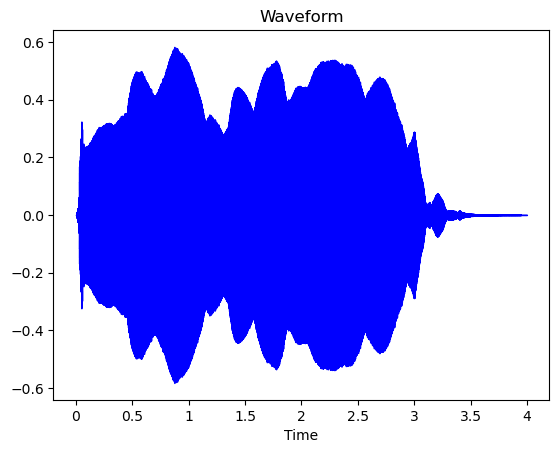

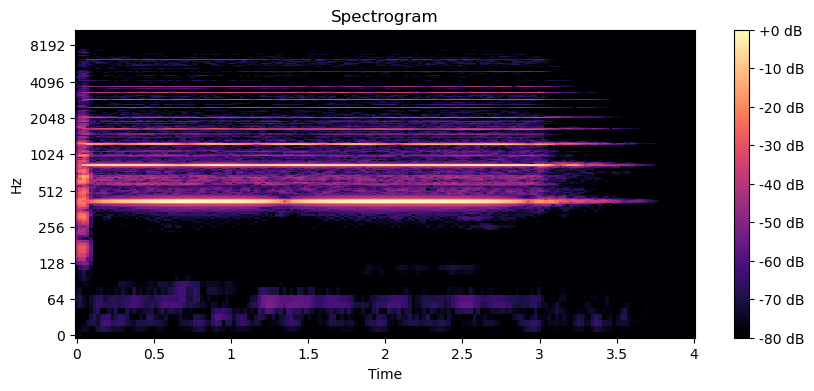

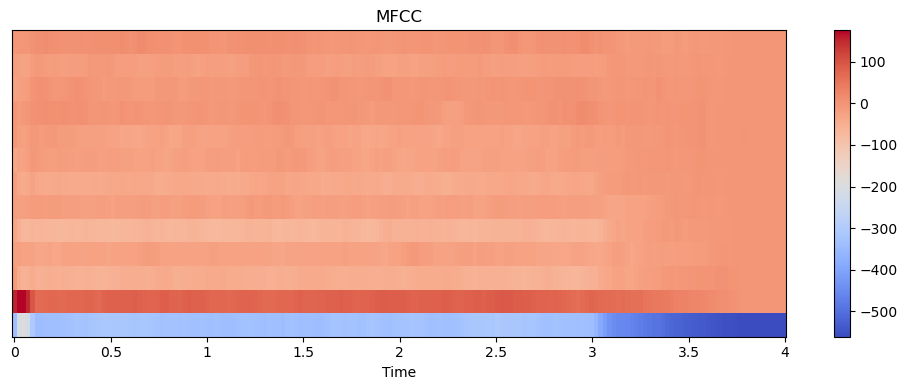

In [7]:
# Load an example of sound file
sample_file = 'nsynth-test/audio/' + reed_files[0] +'.wav' # update for your local folder
y, sr = librosa.load(sample_file)

#Plot the waveform
fig,ax = plt.subplots()
librosa.display.waveshow(y, sr=sr,ax=ax,color='blue')
ax.set_title('Waveform')
plt.show()

#Show the spectogram over time
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

#Show a mfcc matrix
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [9]:
# Extract features for all the reed samples
X, y = [], []
for fname in tqdm.tqdm(reed_files):
    path = 'nsynth-test/audio/' + fname + '.wav'
    y_audio, sr = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=13)
    X.append(mfcc.mean(axis=1))
    label = meta[fname]['pitch']    # MIDI number (e.g., 60 = C4)
    y.append(label)

X = pd.DataFrame(X, columns=[f'MFCC{i}' for i in range(1,14)])
y = pd.Series(y, name='pitch')
df = pd.concat([X, y], axis=1)
df.to_csv('reed_mfcc_features.csv', index=False)

100%|██████████| 235/235 [00:02<00:00, 107.67it/s]
